<a href="https://colab.research.google.com/github/mdanishshaikh/colab_notebooks/blob/master/AML_ASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("ass1.csv")
print(data)

     AGE   INCOME  GENDER MARITAL STATUS BUYS
0     <21    High    Male         Single   No
1     <21    High    Male        Married   No
2   21-35    High    Male         Single  Yes
3     >35  Medium    Male         Single  Yes
4     >35     Low  Female         Single  Yes
5     >35     Low  Female        Married   No
6   21-35     Low  Female        Married  Yes
7     <21  Medium    Male         Single   No
8     <21     Low  Female        Married  Yes
9     >35  Medium  Female         Single  Yes
10    <21  Medium  Female        Married  Yes
11  21-35  Medium    Male        Married  Yes
12  21-35    High  Female         Single  Yes
13    >35  Medium    Male        Married   No


In [ ]:
data.apply(pd.value_counts)
data['BUYS'].value_counts()

Yes    9
No     5
Name: BUYS, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();

In [12]:
x=data.iloc[:,:-1]
x=x.apply(le.fit_transform)
y=data.iloc[:,-1]

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
#what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]

In [15]:
test_x=np.array([1,1,0,0])
pred_y=classifier.predict([test_x])
print("Predicted class is : ",pred_y[0])

Predicted class is :  Yes


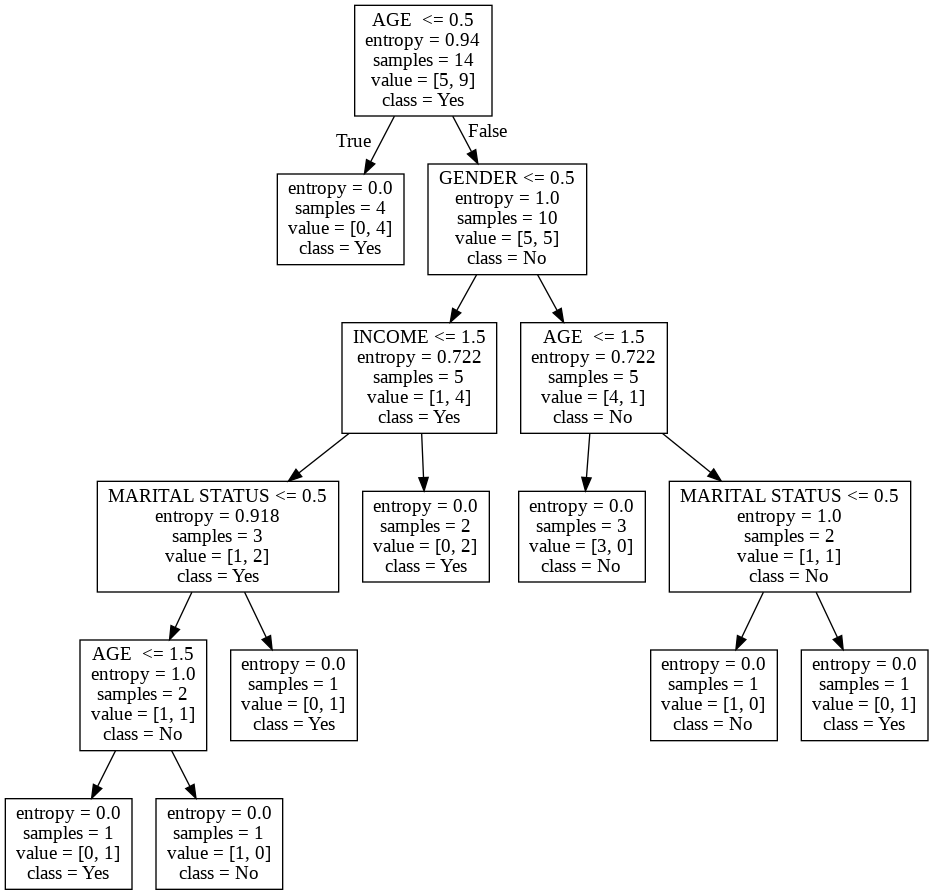

In [16]:
from sklearn.tree import export_graphviz
from IPython.display import Image
export_graphviz(classifier,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
!dot -Tpng data.dot -o tree.png
Image("tree.png")